In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Read dataframe from csv and trim the data
df = pd.read_csv("results.csv")

In [2]:
# Make column for 2 * cleanliness + efficiency
df['new']=df['cleaned']*2+df['efficiency']

In [3]:
# Make column for cleanliness * efficiency
df['new2']=df['cleaned']*df['efficiency']/100

In [4]:
df.sort_values(by=['cleaned', 'efficiency'])

,Unnamed: 0,gamma,epsilon,alpha,episodes,steps,cleaned,efficiency,new,new2
542,542,0.9,0.05,0.9,50.0,50.0,44.117647,42.916667,131.151961,18.933824
38,38,0.5,0.05,0.6,150.0,50.0,46.078431,40.392157,132.549020,18.612072
379,379,0.7,0.10,0.9,50.0,50.0,47.058824,42.738589,136.856236,20.112277
127,127,0.5,0.10,0.6,300.0,50.0,47.058824,43.277311,137.394958,20.365793
56,56,0.5,0.05,0.9,50.0,50.0,50.980392,41.200000,143.160784,21.003922
...,...,...,...,...,...,...,...,...,...,...
290,290,0.7,0.05,0.6,300.0,50.0,100.000000,68.666667,268.666667,68.666667
663,663,0.9,0.20,0.3,150.0,300.0,100.000000,68.666667,268.666667,68.666667
423,423,0.7,0.20,0.3,300.0,50.0,100.000000,71.527778,271.527778,71.527778
103,103,0.5,0.10,0.3,300.0,150.0,100.000000,73.049645,273.049645,73.049645


last row was the best performing trial.

In [5]:
grp = df.groupby(['gamma','epsilon','alpha','episodes','steps'])
x =grp.mean().sort_values(by=['cleaned', 'efficiency'])
x = x.reset_index()
x

,gamma,epsilon,alpha,episodes,steps,Unnamed: 0,cleaned,efficiency,new,new2
0,0.5,0.10,0.3,50.0,50.0,82.0,62.745098,45.168761,170.658957,28.460954
1,0.9,0.05,0.9,50.0,50.0,541.0,64.052288,43.967321,172.071896,28.260202
2,0.5,0.05,0.6,50.0,50.0,28.0,64.379085,46.694170,175.452340,30.113122
3,0.9,0.05,0.3,50.0,50.0,487.0,66.666667,45.998868,179.332202,30.733252
4,0.7,0.05,0.3,50.0,50.0,244.0,67.320261,45.441673,180.082196,30.507140
...,...,...,...,...,...,...,...,...,...,...
238,0.9,0.20,0.6,300.0,50.0,694.0,99.346405,54.311206,253.004016,53.954974
239,0.9,0.20,0.3,150.0,300.0,664.0,99.673203,57.872036,257.218442,57.706223
240,0.5,0.05,0.6,300.0,300.0,52.0,99.673203,58.996926,258.343331,58.816926
241,0.9,0.20,0.3,300.0,300.0,673.0,100.000000,57.323985,257.323985,57.323985


Last row is the best performing parameter combination (average of 3 trials)

# now testing performance based on steps and episodes.

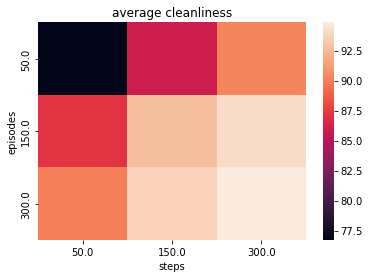

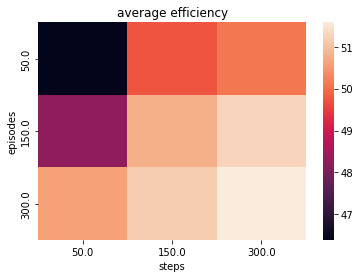

In [34]:
gropued = df.groupby(['episodes','steps'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average cleanliness")
#plt.savefig('sarsa-300x300-clean.png')
plt.show()
gropued = df.groupby(['episodes','steps'])
avg_cln = gropued['efficiency'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average efficiency")
#plt.savefig('sarsa-300x300-eff.png')
plt.show()

In [16]:
col1, col2 = "cleaned", "efficiency"
corr = x[col1].corr(x[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  cleaned  and  efficiency is:  0.66


In [6]:
import copy
d = copy.deepcopy(x)
d = d[d['episodes']==300]
d = d[d['steps']==300]
d

,gamma,epsilon,alpha,episodes,steps,Unnamed: 0,cleaned,efficiency,new,new2
77,0.7,0.10,0.9,300.0,300.0,403.0,87.254902,53.276178,227.785982,46.482481
87,0.7,0.20,0.6,300.0,300.0,457.0,88.562092,51.469854,228.594037,46.397270
101,0.5,0.20,0.3,300.0,300.0,187.0,89.869281,48.129799,227.868361,43.679713
111,0.5,0.10,0.3,300.0,300.0,106.0,90.849673,53.711598,235.410944,49.217445
130,0.9,0.20,0.9,300.0,300.0,727.0,92.810458,47.082752,232.703667,43.660415
133,0.9,0.10,0.9,300.0,300.0,646.0,93.137255,47.045226,233.319735,43.818617
135,0.9,0.05,0.9,300.0,300.0,565.0,93.137255,49.593451,235.867961,46.167067
136,0.7,0.20,0.9,300.0,300.0,484.0,93.137255,50.225418,236.499928,46.936193
147,0.7,0.20,0.3,300.0,300.0,430.0,93.790850,53.811440,241.393139,50.490472
153,0.9,0.05,0.3,300.0,300.0,511.0,94.117647,51.621077,239.856371,48.543272


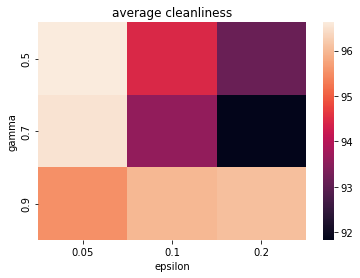

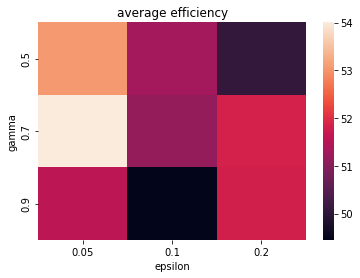

In [36]:
gropued = d.groupby(['gamma','epsilon'])
avg_cln = gropued['cleaned'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average cleanliness")
#plt.savefig('sarsa-gammaxepsilon-clean.png')
plt.show()
gropued = d.groupby(['gamma','epsilon'])
avg_cln = gropued['efficiency'].mean().unstack()
sns.heatmap(avg_cln)
plt.title("average efficiency")
#plt.savefig('sarsa-gammaxepsilon-eff.png')
plt.show()

In [8]:
d1 = copy.deepcopy(d)
d1 = d1[d1['epsilon']==0.05]
d1 = d1[d1['gamma']==0.5]
d1

,gamma,epsilon,alpha,episodes,steps,Unnamed: 0,cleaned,efficiency,new,new2
161,0.5,0.05,0.3,300.0,300.0,25.0,94.444444,49.198474,238.087363,46.446783
185,0.5,0.05,0.9,300.0,300.0,79.0,95.751634,50.962369,242.465637,48.825600
240,0.5,0.05,0.6,300.0,300.0,52.0,99.673203,58.996926,258.343331,58.816926
